Krok 1: Przygotowanie przetwarzania obrazów odcisków palca

In [6]:
import os

# Lista plików w folderze DB1_B
folder_path = "fingerprint_data/DB1_B"
files = os.listdir(folder_path)
print("Dostępne pliki:", files)


Dostępne pliki: ['101_1.tif', '101_2.tif', '101_3.tif', '101_4.tif', '101_5.tif', '101_6.tif', '101_7.tif', '101_8.tif', '102_1.tif', '102_2.tif', '102_3.tif', '102_4.tif', '102_5.tif', '102_6.tif', '102_7.tif', '102_8.tif', '103_1.tif', '103_2.tif', '103_3.tif', '103_4.tif', '103_5.tif', '103_6.tif', '103_7.tif', '103_8.tif', '104_1.tif', '104_2.tif', '104_3.tif', '104_4.tif', '104_5.tif', '104_6.tif', '104_7.tif', '104_8.tif', '105_1.tif', '105_2.tif', '105_3.tif', '105_4.tif', '105_5.tif', '105_6.tif', '105_7.tif', '105_8.tif', '106_1.tif', '106_2.tif', '106_3.tif', '106_4.tif', '106_5.tif', '106_6.tif', '106_7.tif', '106_8.tif', '107_1.tif', '107_2.tif', '107_3.tif', '107_4.tif', '107_5.tif', '107_6.tif', '107_7.tif', '107_8.tif', '108_1.tif', '108_2.tif', '108_3.tif', '108_4.tif', '108_5.tif', '108_6.tif', '108_7.tif', '108_8.tif', '109_1.tif', '109_2.tif', '109_3.tif', '109_4.tif', '109_5.tif', '109_6.tif', '109_7.tif', '109_8.tif', '110_1.tif', '110_2.tif', '110_3.tif', '110_4.t

In [10]:
import cv2
import os

# Folder na dane rejestracji
DATA_DIR = "fingerprint_data"
os.makedirs(DATA_DIR, exist_ok=True)

def preprocess_image(image_path, size=(128, 128)):
    """
    Wczytuje obraz odcisku palca, konwertuje go do skali szarości i zmienia rozmiar.
    """
    # Wczytaj obraz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    
    # Zmień rozmiar
    resized_image = cv2.resize(image, size)
    return resized_image

# Test przetwarzania obrazu
image_path = "fingerprint_data/DB1_B/101_1.tif"  # Przykładowy obraz z FVC2002
processed_image = preprocess_image(image_path)
cv2.imwrite("processed_image.jpg", processed_image)


True

Krok 2: System rejestracji użytkownika

In [ ]:
import cv2
import os
import numpy as np

# Folder na dane użytkowników
DATABASE_DIR = "database"
os.makedirs(DATABASE_DIR, exist_ok=True)

def preprocess_image(image_path, size=(128, 128)):
    """
    Wczytuje obraz odcisku palca, konwertuje go do skali szarości i zmienia rozmiar.
    """
    # Wczytaj obraz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    
    # Zmień rozmiar
    resized_image = cv2.resize(image, size)
    return resized_image

def register_user(username, image_path):
    """
    Rejestruje użytkownika, zapisując przetworzone cechy obrazu do pliku w folderze `database`.
    """
    # Przetwórz obraz
    processed_image = preprocess_image(image_path)
    
    # Wyciągnij cechy (spłaszczony obraz na razie)
    features = processed_image.flatten()  # Zamiana obrazu na wektor cech
    
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(DATABASE_DIR, f"{username}.txt")
    
    # Zapisz cechy do pliku
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"Zarejestrowano użytkownika '{username}' i zapisano dane do {user_file}")

# Przykładowa rejestracja użytkownika
register_user("user_101", "fingerprint_data/DB1_B/101_1.tif")


Zarejestrowano użytkownika 'user_101' i zapisano dane do database\user_101.txt


Krok 3: Logowanie użytkownika

In [13]:
def authenticate_user(username, image_path, threshold=5000):
    """
    Logowanie użytkownika przez porównanie nowego obrazu odcisku palca z zapisanym wektorem cech.
    """
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(DATABASE_DIR, f"{username}.txt")
    
    # Sprawdź, czy plik użytkownika istnieje
    if not os.path.exists(user_file):
        print(f"Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Przetwórz nowy obraz odcisku palca
    processed_image = preprocess_image(image_path)
    new_features = processed_image.flatten()
    
    # Wczytaj zapisane cechy użytkownika
    registered_features = np.loadtxt(user_file)
    
    # Oblicz odległość euklidesową
    distance = np.linalg.norm(registered_features - new_features)
    print(f"Odległość między zapisanymi a nowymi cechami: {distance}")
    
    # Sprawdź, czy odległość jest poniżej progu
    if distance < threshold:
        print(f"Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"Logowanie nieudane: odległość ({distance}) przekroczyła próg ({threshold}).")
        return False

# Przykładowe logowanie użytkownika
authenticate_user("user_101", "fingerprint_data/DB1_B/101_1.tif")
# authenticate_user("user_101", "fingerprint_data/DB1_B/101_2.tif")


Odległość między zapisanymi a nowymi cechami: 0.0
Użytkownik 'user_101' został pomyślnie zalogowany.


True

Krok 4: Użycie CNN do ekstrakcji cech

Epoka 1/5: Strata: 23.7916, Dokładność: 53.12%, Czas: 5.28s
Epoka 2/5: Strata: 7.1512, Dokładność: 85.62%, Czas: 5.23s
Epoka 3/5: Strata: 3.7326, Dokładność: 91.56%, Czas: 5.16s
Epoka 4/5: Strata: 3.1573, Dokładność: 93.12%, Czas: 5.07s
Epoka 5/5: Strata: 1.9572, Dokładność: 96.56%, Czas: 5.08s
Model został zapisany jako 'fingerprint_cnn.pth'


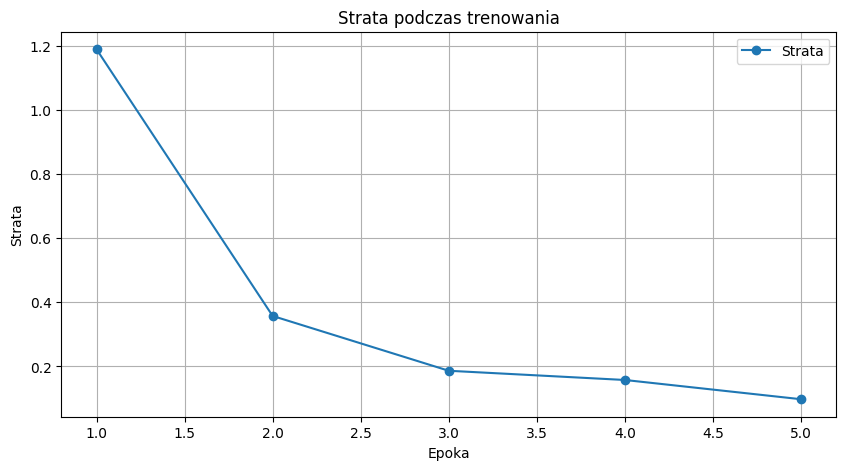

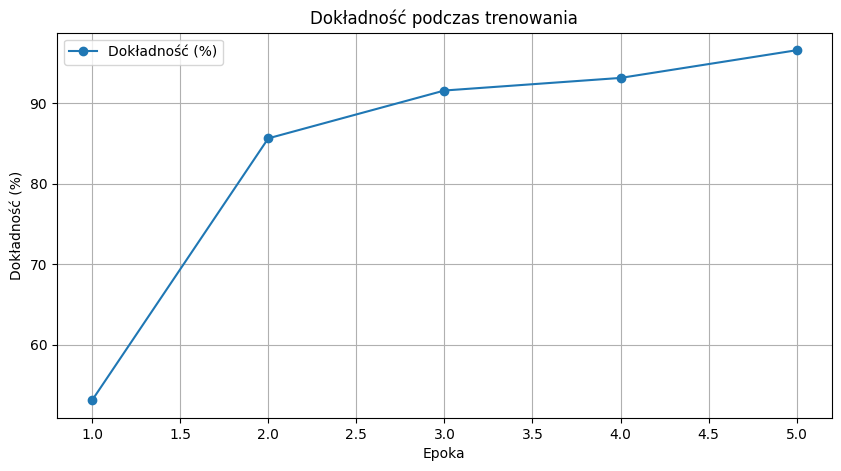

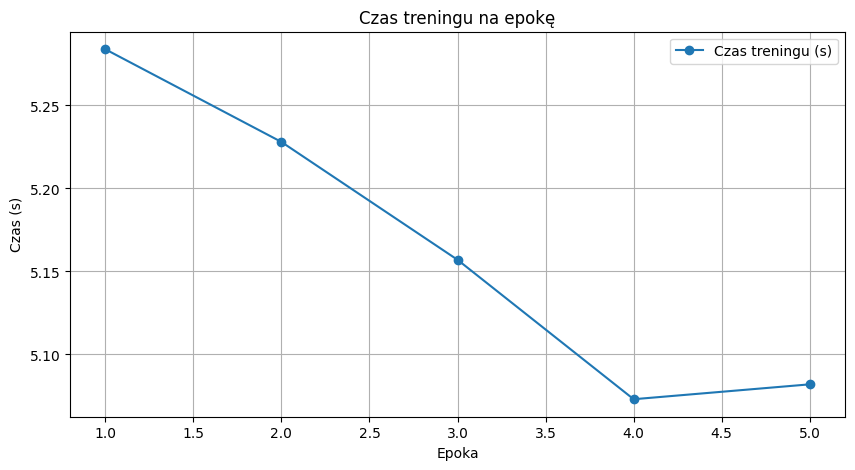

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Dataset: Obsługuje podfoldery jako klasy
class FingerprintDataset(Dataset):
    def __init__(self, root_path, size=(128, 128)):
        self.image_paths = []
        self.labels = []
        self.size = size
        self.label_mapping = {}  # Mapowanie etykiet na indeksy
        
        # Przeglądaj podfoldery
        label_index = 0
        for folder in os.listdir(root_path):
            folder_full_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_full_path):  # Tylko katalogi
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_full_path):
                    file_path = os.path.join(folder_full_path, file)
                    if file.endswith(('.png', '.jpg', '.jpeg', '.tif')):  # Obsługiwane formaty
                        self.image_paths.append(file_path)
                        self.labels.append(label_index)
                label_index += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Wczytaj obraz i etykietę
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Wczytaj i przetwórz obraz
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Nie znaleziono obrazu {image_path}")
        image = cv2.resize(image, self.size) / 255.0  # Normalizacja do [0, 1]
        image = np.expand_dims(image, axis=0)  # Dodaj kanał
        
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# Sieć konwolucyjna (CNN)
class FingerprintCNN(nn.Module):
    def __init__(self):
        super(FingerprintCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # Liczba klas: dostosuj do danych
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Przygotowanie zbioru danych
dataset = FingerprintDataset("fingerprint_data")  # Główny folder z danymi
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Inicjalizacja modelu, optymalizatora i funkcji straty
model = FingerprintCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Monitorowanie statystyk
train_losses = []
accuracies = []
epoch_times = []

# Trenowanie sieci
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    start_time = time.time()
    
    for images, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        # Oblicz dokładność
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)
    train_losses.append(total_loss / len(dataloader))  # Średnia strata
    accuracies.append(correct / total * 100)  # Dokładność w %

    print(f"Epoka {epoch+1}/{epochs}: Strata: {total_loss:.4f}, Dokładność: {accuracies[-1]:.2f}%, Czas: {epoch_time:.2f}s")

# Zapis modelu
torch.save(model.state_dict(), "fingerprint_cnn.pth")
print("Model został zapisany jako 'fingerprint_cnn.pth'")

# Wizualizacja wyników
# 1. Wykres strat
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Strata')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata podczas trenowania")
plt.legend()
plt.grid()
plt.show()

# 2. Wykres dokładności
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), accuracies, marker='o', label='Dokładność (%)')
plt.xlabel("Epoka")
plt.ylabel("Dokładność (%)")
plt.title("Dokładność podczas trenowania")
plt.legend()
plt.grid()
plt.show()

# 3. Wykres czasu treningu
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_times, marker='o', label='Czas treningu (s)')
plt.xlabel("Epoka")
plt.ylabel("Czas (s)")
plt.title("Czas treningu na epokę")
plt.legend()
plt.grid()
plt.show()


Zmiana rejestracji na użycie CNN

In [ ]:
def register_user_with_cnn(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, wyciągając cechy odcisku palca za pomocą wytrenowanego modelu CNN.
    """
    # Utwórz folder, jeśli nie istnieje
    os.makedirs(database_dir, exist_ok=True)
    
    # Wczytaj obraz i przetwórz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    image = cv2.resize(image, (128, 128)) / 255.0
    image = np.expand_dims(image, axis=(0, 1))  # Dodaj wymiary: (batch, channel, height, width)
    
    # Zamień na tensor
    image_tensor = torch.tensor(image, dtype=torch.float32)
    
    # Wyciągnij cechy za pomocą modelu
    model.eval()  # Ustaw model w tryb ewaluacji
    with torch.no_grad():
        features = model.conv_layers(image_tensor).flatten().numpy()
    
    # Zapisz cechy do pliku
    user_file = os.path.join(database_dir, f"{username}.txt")
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"Zarejestrowano użytkownika '{username}' i zapisano cechy w {user_file}")

# Przykład rejestracji
register_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_1.tif", model)


Zarejestrowano użytkownika 'user_101' i zapisano cechy w database\user_101.txt


Logowanie użytkownika za pomocą CNN

In [ ]:
def authenticate_user_with_cnn(username, image_path, model, database_dir="database", threshold=10.0):
    """
    Logowanie użytkownika poprzez porównanie cech odcisku palca z zapisanymi w bazie danych.
    """
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(database_dir, f"{username}.txt")
    
    # Sprawdź, czy plik użytkownika istnieje
    if not os.path.exists(user_file):
        print(f"Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytaj zapisane cechy
    registered_features = np.loadtxt(user_file)
    
    # Wczytaj nowy obraz i przetwórz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    image = cv2.resize(image, (128, 128)) / 255.0
    image = np.expand_dims(image, axis=(0, 1))  # Dodaj wymiary: (batch, channel, height, width)
    
    # Zamień na tensor
    image_tensor = torch.tensor(image, dtype=torch.float32)
    
    # Wyciągnij cechy za pomocą modelu
    model.eval()  # Ustaw model w tryb ewaluacji
    with torch.no_grad():
        new_features = model.conv_layers(image_tensor).flatten().numpy()
    
    # Oblicz odległość euklidesową
    distance = np.linalg.norm(registered_features - new_features)
    print(f"Odległość między cechami: {distance}")
    
    # Sprawdź, czy odległość jest poniżej progu
    if distance < threshold:
        print(f"Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"Logowanie nieudane: odległość ({distance}) przekroczyła próg ({threshold}).")
        return False

# Przykład logowania
authenticate_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_1.tif", model)
# authenticate_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_2.tif", model)


Odległość między cechami: 0.00028799863505883823
Użytkownik 'user_101' został pomyślnie zalogowany.


True

Sieć neuronowa do analizy cech geometrycznych dodanir geometrii palca Ekstrakcja cech geometrycznych

In [1]:
import cv2
import numpy as np

def extract_geometric_features(image_path):
    """
    Ekstrakcja geometrycznych cech z odcisku palca.
    """
    # Wczytaj obraz w skali szarości
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    # Przekształcenie do obrazu binarnego
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Znajdź kontury
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        raise ValueError("Nie znaleziono konturów na obrazie.")
    
    # Wybierz największy kontur (zakładamy, że to odcisk palca)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Oblicz cechy geometryczne
    area = cv2.contourArea(largest_contour)  # Powierzchnia konturu
    perimeter = cv2.arcLength(largest_contour, True)  # Obwód konturu
    x, y, w, h = cv2.boundingRect(largest_contour)  # Prostokąt ograniczający
    aspect_ratio = w / h  # Proporcje szerokości do wysokości
    extent = area / (w * h)  # Powierzchnia w stosunku do prostokąta ograniczającego
    
    # Zwróć cechy jako wektor
    return np.array([area, perimeter, aspect_ratio, extent])


In [6]:
# Przykładowa ścieżka do obrazu (zmień na prawdziwą w swoim systemie)
image_path = "fingerprint_data/DB1_B/101_1.tif"  # Zamień na poprawną ścieżkę

# Wywołanie funkcji
try:
    features = extract_geometric_features(image_path)
    print("Wyekstrahowane cechy geometryczne:")
    print(f"Powierzchnia konturu: {features[0]}")
    print(f"Obwód konturu: {features[1]}")
    print(f"Proporcje szerokości do wysokości: {features[2]}")
    print(f"Powierzchnia w stosunku do prostokąta ograniczającego: {features[3]}")
except Exception as e:
    print(f"Błąd: {e}")


Wyekstrahowane cechy geometryczne:
Powierzchnia konturu: 1144.0
Obwód konturu: 671.7199033498764
Proporcje szerokości do wysokości: 1.4867256637168142
Powierzchnia w stosunku do prostokąta ograniczającego: 0.06026127265065318


Kod modelu łączonego

In [11]:
import torch
import torch.nn as nn

class CombinedFingerprintModel(nn.Module):
    def __init__(self, cnn_output_size=128, geometry_input_size=4, num_classes=10):
        super(CombinedFingerprintModel, self).__init__()
        
        # Część CNN
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, cnn_output_size),  # Zmniejszenie wymiarów cech
            nn.ReLU()
        )
        
        # Połączenie cech CNN i geometrycznych
        self.combined_fc = nn.Sequential(
            nn.Linear(cnn_output_size + geometry_input_size, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)  # Liczba klas (np. liczba użytkowników)
        )
    
    def forward(self, image, geometry_features):
        """
        Forward pass modelu.
        - image: wejście obrazowe (batch_size, 1, 128, 128)
        - geometry_features: wejście geometryczne (batch_size, 4)
        """
        # Wyciągnij cechy z CNN
        cnn_features = self.cnn(image)
        
        # Połącz cechy CNN z geometrycznymi
        combined_features = torch.cat((cnn_features, geometry_features), dim=1)
        
        # Klasyfikacja
        output = self.combined_fc(combined_features)
        return output


Dataset łączony

In [12]:
from torch.utils.data import Dataset

class CombinedFingerprintDataset(Dataset):
    def __init__(self, root_path):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        
        # Przeglądaj podfoldery i przypisz etykiety
        label_index = 0
        for folder in os.listdir(root_path):
            folder_full_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_full_path):
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_full_path):
                    self.image_paths.append(os.path.join(folder_full_path, file))
                    self.labels.append(label_index)
                label_index += 1
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Wczytaj obraz
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Wyciągnij cechy geometryczne
        geometry_features = extract_geometric_features(image_path)
        
        # Przygotuj obraz dla CNN
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128)) / 255.0
        image = np.expand_dims(image, axis=0)  # Dodaj kanał (1, 128, 128)
        
        # Zwróć dane jako tensory
        return (
            torch.tensor(image, dtype=torch.float32),
            torch.tensor(geometry_features, dtype=torch.float32),
            torch.tensor(label, dtype=torch.long)
        )


Trenowanie modelu

Epoka 1/10, Strata: 144.6478, Dokładność: 26.88%, Czas: 6.69s
Epoka 2/10, Strata: 35.1402, Dokładność: 37.81%, Czas: 6.08s
Epoka 3/10, Strata: 17.2135, Dokładność: 50.62%, Czas: 6.56s
Epoka 4/10, Strata: 8.3115, Dokładność: 60.31%, Czas: 6.20s
Epoka 5/10, Strata: 4.6926, Dokładność: 70.31%, Czas: 6.04s
Epoka 6/10, Strata: 10.6346, Dokładność: 67.81%, Czas: 6.10s
Epoka 7/10, Strata: 5.2340, Dokładność: 71.25%, Czas: 7.55s
Epoka 8/10, Strata: 9.6253, Dokładność: 80.31%, Czas: 8.77s
Epoka 9/10, Strata: 3.6207, Dokładność: 83.44%, Czas: 9.19s
Epoka 10/10, Strata: 2.4327, Dokładność: 86.56%, Czas: 8.93s
Model został zapisany jako 'combined_fingerprint_model.pth'


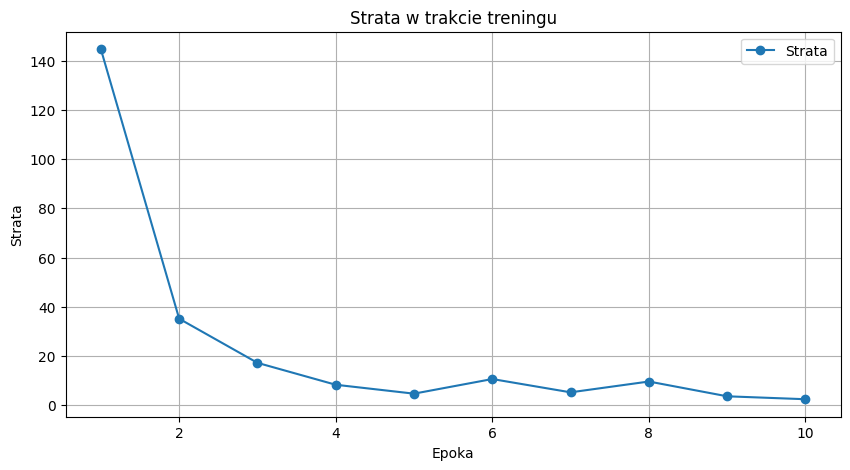

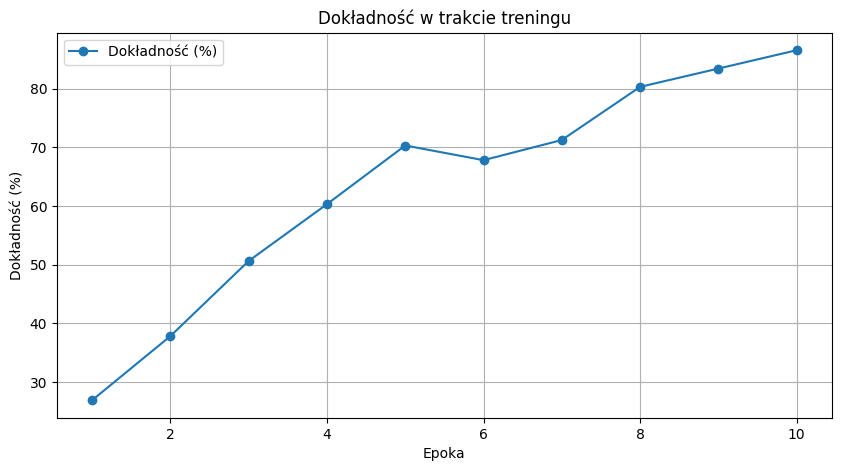

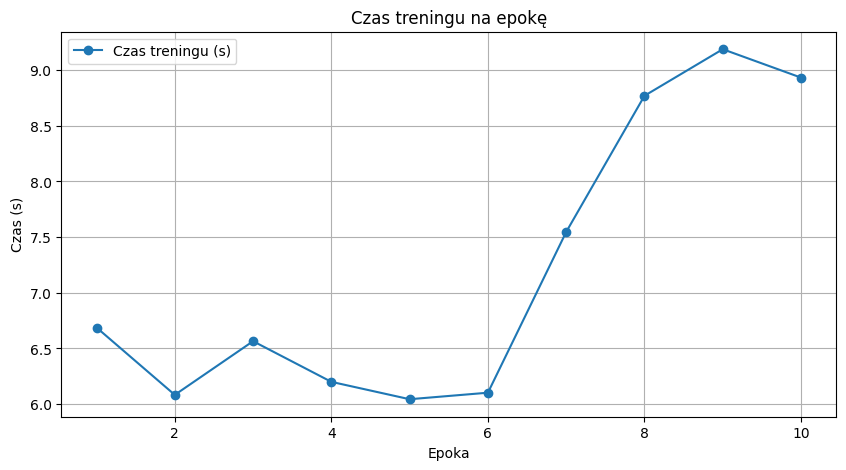

In [14]:
import time
import matplotlib.pyplot as plt

# Przygotowanie danych
dataset = CombinedFingerprintDataset("fingerprint_data")
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Inicjalizacja modelu, optymalizatora i funkcji straty
model = CombinedFingerprintModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Statystyki
epoch_losses = []
epoch_accuracies = []
training_times = []

# Trenowanie modelu
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    start_time = time.time()
    
    for images, geometry_features, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images, geometry_features)
        
        # Oblicz stratę
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Oblicz dokładność
        _, predicted = torch.max(outputs, dim=1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    # Koniec epoki
    end_time = time.time()
    epoch_time = end_time - start_time
    training_times.append(epoch_time)
    
    epoch_loss = total_loss / len(dataloader)  # Średnia strata na epokę
    epoch_accuracy = (correct_predictions / total_samples) * 100  # Dokładność w %
    
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)
    
    print(f"Epoka {epoch+1}/{epochs}, Strata: {epoch_loss:.4f}, Dokładność: {epoch_accuracy:.2f}%, Czas: {epoch_time:.2f}s")

# Zapis modelu
torch.save(model.state_dict(), "combined_fingerprint_model.pth")
print("Model został zapisany jako 'combined_fingerprint_model.pth'")

# Wizualizacja strat
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_losses, marker='o', label="Strata")
plt.title("Strata w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()
plt.grid()
plt.show()

# Wizualizacja dokładności
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_accuracies, marker='o', label="Dokładność (%)")
plt.title("Dokładność w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Dokładność (%)")
plt.legend()
plt.grid()
plt.show()

# Wizualizacja czasu treningu
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), training_times, marker='o', label="Czas treningu (s)")
plt.title("Czas treningu na epokę")
plt.xlabel("Epoka")
plt.ylabel("Czas (s)")
plt.legend()
plt.grid()
plt.show()


Kod Rejestracji

In [15]:
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy CNN i geometryczne do bazy danych.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 128, 128)
    
    # Wyciągnięcie cech CNN
    model.eval()
    with torch.no_grad():
        cnn_features = model.cnn(image_tensor).flatten().numpy()
    print(f"[INFO] Wyekstrahowano cechy CNN: {cnn_features.shape}")
    
    # Zapisanie cech CNN
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    np.savetxt(cnn_file, cnn_features, fmt="%.5f")
    print(f"[INFO] Cechy CNN zapisane w pliku: {cnn_file}")
    
    # Wyciągnięcie cech geometrycznych
    geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano cechy geometryczne: {geometry_features}")
    
    # Zapisanie cech geometrycznych
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    np.savetxt(geometry_file, geometry_features, fmt="%.5f")
    print(f"[INFO] Cechy geometryczne zapisane w pliku: {geometry_file}")
    
    print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zarejestrowany.")


Kod Logowania

In [16]:
def login_user(username, image_path, model, database_dir="database", cnn_threshold=10.0, geometry_threshold=5.0):
    """
    Loguje użytkownika, porównując cechy CNN i geometryczne.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")
    
    # Sprawdzenie, czy pliki z cechami istnieją
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    
    if not os.path.exists(cnn_file) or not os.path.exists(geometry_file):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytanie zapisanych cech
    registered_cnn_features = np.loadtxt(cnn_file)
    registered_geometry_features = np.loadtxt(geometry_file)
    print("[INFO] Wczytano zapisane cechy użytkownika.")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 128, 128)
    
    # Wyciągnięcie nowych cech CNN
    model.eval()
    with torch.no_grad():
        new_cnn_features = model.cnn(image_tensor).flatten().numpy()
    print(f"[INFO] Wyekstrahowano nowe cechy CNN.")
    
    # Wyciągnięcie nowych cech geometrycznych
    new_geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano nowe cechy geometryczne.")
    
    # Obliczenie odległości
    cnn_distance = np.linalg.norm(registered_cnn_features - new_cnn_features)
    geometry_distance = np.linalg.norm(registered_geometry_features - new_geometry_features)
    print(f"[INFO] Odległość CNN: {cnn_distance:.2f}")
    print(f"[INFO] Odległość Geometryczna: {geometry_distance:.2f}")
    
    # Sprawdzenie progów
    if cnn_distance < cnn_threshold and geometry_distance < geometry_threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane. Odległości przekroczyły progi.")
        return False


Test

In [17]:
# Ścieżka do przykładowego obrazu
example_image_path = "fingerprint_data/DB1_B/101_1.tif"

# Rejestracja użytkownika
register_user("Jan", example_image_path, model)


[INFO] Rejestracja użytkownika: Jan
[INFO] Wyekstrahowano cechy CNN: (128,)
[INFO] Cechy CNN zapisane w pliku: database\Jan_cnn.txt
[INFO] Wyekstrahowano cechy geometryczne: [1.14400000e+03 6.71719903e+02 1.48672566e+00 6.02612727e-02]
[INFO] Cechy geometryczne zapisane w pliku: database\Jan_geometry.txt
[SUCCESS] Użytkownik 'Jan' został pomyślnie zarejestrowany.


In [19]:
example_image_path2 = "fingerprint_data/DB1_B/101_2.tif"
# Logowanie użytkownika
login_user("Jan", example_image_path2, model)


[INFO] Logowanie użytkownika: Jan
[INFO] Wczytano zapisane cechy użytkownika.
[INFO] Wyekstrahowano nowe cechy CNN.
[INFO] Wyekstrahowano nowe cechy geometryczne.
[INFO] Odległość CNN: 129.16
[INFO] Odległość Geometryczna: 381.77
[FAILURE] Logowanie nieudane. Odległości przekroczyły progi.


False